<a href="https://colab.research.google.com/github/JCefla/SIM_YAC_LEMA_UPSE2023/blob/main/Ejercicio1_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

Datos del yacimiento

In [2]:
PresionYac = 4000
Tiempo = 100000
D_total = 1000
nodos = 6
dt = 10

In [3]:
# Se colocan todos los parámetros necesarios para el calculo de la distancia y la variacion de la misma
dx = D_total / (nodos - 1)
D_total= np.arange(0,D_total+1,dx)

Iteraciones requeridas

In [4]:
num_iter = int(Tiempo / dt)

Arreglo en zero para colocar las presiones

In [5]:
P01 = np.zeros(nodos)
P02 = np.zeros(nodos)

Condiciones iniciales de frontera

In [6]:
P01[0] = 0 
P01[nodos - 1] = 0
P01[1:nodos - 1] = PresionYac

In [7]:
Preionalma = [np.copy(P01)]

In [8]:
import matplotlib.pyplot as plt

Calculo de iteraciones con la formula de difusividad

In [13]:
for _ in range(num_iter):
    for i in range(1, nodos - 1):   
        P02[i] = ((math.floor(P01[i - 1]) - 2 * math.floor(P01[i]) + math.floor(P01[i + 1])) / (dx ** 2)) * dt + math.floor(P01[i])
    P01 = np.copy(P02)
    Preionalma.append(np.copy(P01))# Almacenar los valores en C/U tiempo
presiones = np.array(Preionalma)
tiempos = np.arange(0, Tiempo + dt, dt)#Arreglo de tiempo
print("Presiones con respecto al tiempo:")
for tiempo, presion in enumerate(presiones):
    print(f"Tiempo: {Tiempo * dt}, Presiones: {presion}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones: [0. 0. 0. 0. 0. 0.]
Tiempo: 1000000, Presiones:

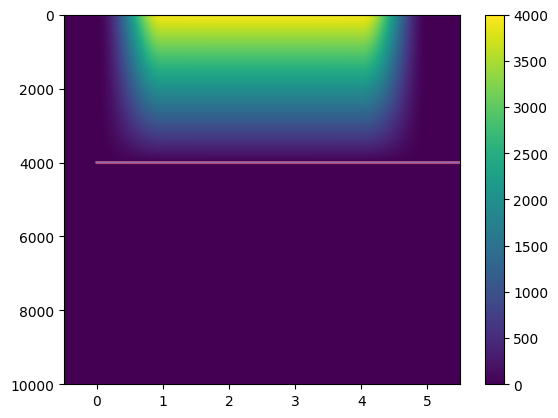

In [10]:
plt.plot(tiempos, presiones)
imgplot = plt.imshow(presiones,aspect='auto')
plt.colorbar()

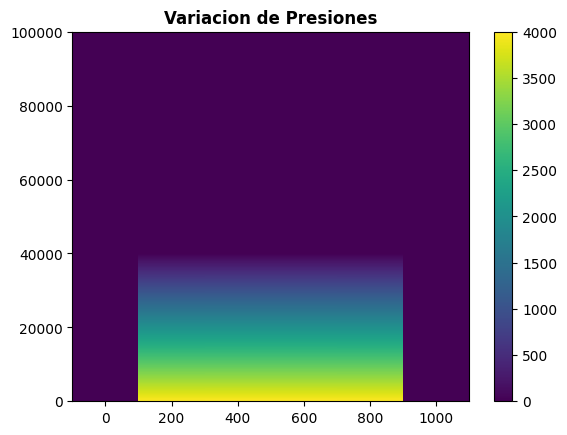

In [11]:
c = plt.pcolormesh(D_total,tiempos,presiones)
plt.colorbar(c)
 
plt.title('Variacion de Presiones', fontweight ="bold")
plt.show()

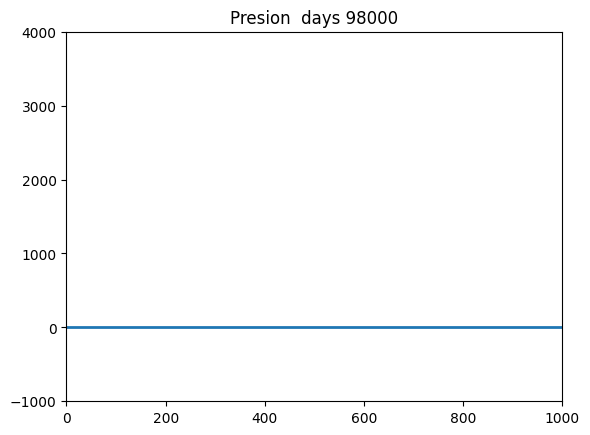

In [14]:
#@title Texto de título predeterminado
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.set_xlim((0, 1000))
ax.set_ylim((-1000, 4000))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def init():
    line.set_data([],[])
    return(line,)

def animate(i):
    x = D_total
    y = presiones[i]
    line.set_data(x, y)
    #line2.set_data(y, x)
    ax.set(title='Presion  days ' + str(i*dt))
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=range(0,10000,200), interval=400, blit=True)
HTML(anim.to_html5_video())